<b><font size="20"> Introduction </font></b>
 
As the life expectancy continues to rise whilst birth rates are steadily decreasing, the aging population has seen a surge in recent decades which is expected to continue. Aging is a tremendous risk factor for a variety of health issues spanning from physical such as cardiovascular diseases, arthritis to mental such as dementia. Diagnosing these medical conditions demands a long, intrusive, uncomfortable process whilst obtaining data from patients. The aim is to mitigate this through predictive models which utilize the relationships between key characteristics and the susceptibility to certain conditions.

For this kaggle competition, we are provided with a dataset of health characteristics which will enable us to predict whether a patient has one of three medical conditions.

Let us begin by taking a closer look at this dataset.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/train.csv')
print(f'Dataset contains {data.shape[0]} rows with {data.shape[1]} columns.')


Dataset contains 617 rows with 58 columns.


As we can see, the provided dataset contains 617 samples with each sample comprising of 58 different characteristics. We can run the following code to observe these characteristics.

In [3]:
data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


The dataset provides an Id of each sample, 56 features and a Class label. This class label is the target variable and indicates whether the given patient has none of the three conditions with a value of '0' or if they have at least one of the conditions with a value of '1'.

The following code highlights some key descriptive statistics of the dataset.

In [4]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [7]:
X = data.iloc[:,1:57] # We are only interested in the features so remove Id and Class Columns
y = data.iloc[:,57]
cols = X.columns
numeric_cols = X._get_numeric_data().columns
print(f'{list(set(cols) - set(numeric_cols))} contains the set of categorical features.')
print(X['EJ'].unique())

['EJ'] contains the set of categorical features.
['B' 'A']


We can see that 'EJ' is the sole categorical feature. It is seemingly nominal and only takes two values being 'A' or 'B'. A nominal variable refers to categories which do not have an inherent order such as 'low', 'medium', 'high'.

Kaggle provided an additional dataset called 'greeks.csv', an overview of which is displayed below.

In [3]:
greeks = pd.read_csv('datasets/greeks.csv')
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


The feature called 'Alpha' is similar to the Class feature in the original dataset. A value of 'A' indicates no condition whilst 'B', 'C' and 'D' correspond to differing medical conditions. In other words, 'A' equates to Class 0 and 'B', 'C' or 'D' would equate to Class 1. This facilitates an interesting experimentation with multinomial classification and whether that will peform better than the intended binomial classification.

Additional experimental features Beta, Gamma and Delta have also been provided along with the date of information retrieval although it is unclear at this stage how these will be incorporated into the problem since they are not present in the test set. An idea is that the time of retrieval has an effect on the health conditions which does encourage the removal of selection bias through random shuffling.

<b><font size="20">Methods</font></b>

<b>Dealing with categorical features</b>

A categorical feature cannot be immediately incorporated into most machine learning algorithms, they require some form of encoding into a numerical value. 

For this report, we compared One Hot Enconding (OHE), Probability Ratio Encoding (PRE) and Frequency Encoding (FE). 



PRE is only suited for binary classification and replaces the values with the probability of the target variable being 1 divided by the probability being 0 for that corresponding value. Frequency Encoding

In [19]:
def PRE(val, data):
    true = len(data[(data['EJ'] == val) & (data['Class'] == 1)])
    false = len(data[(data['EJ'] == val) & (data['Class'] == 0)])
    total = true + false
    print(f'For value {val}, the P(1) is {true/total} and P(0) = {false/total} with PRE = {true/false}.')
    if false:
        return true/false
    return 1

X = X.replace('A', PRE('A', data))
X = X.replace('B', PRE('B', data))

For value A, the P(1) is 0.12612612612612611 and P(0) = 0.8738738738738738 with PRE = 0.14432989690721648.
For value B, the P(1) is 0.20253164556962025 and P(0) = 0.7974683544303798 with PRE = 0.25396825396825395.


We have replaced the values of 'EJ' by their corresponding PRE.

In [21]:
X['EJ']

0      0.253968
1      0.144330
2      0.253968
3      0.253968
4      0.253968
         ...   
612    0.144330
613    0.253968
614    0.144330
615    0.253968
616    0.144330
Name: EJ, Length: 617, dtype: float64

If we run the following code, we can see that there are a missing values in the dataset.


BQ has 60 missing values
CB has 2 missing values
CC has 3 missing values
DU has 1 missing values
EL has 60 missing values
FC has 1 missing values
FL has 1 missing values
FS has 2 missing values
GL has 1 missing values


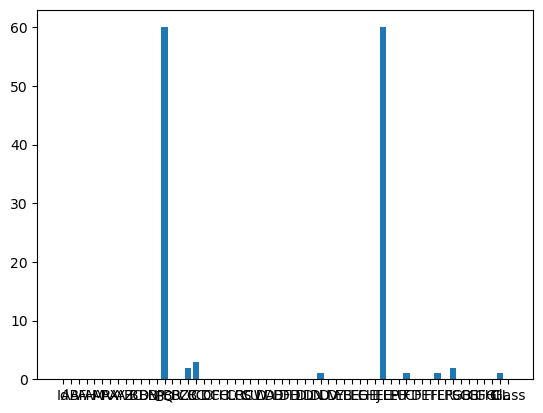

In [13]:
import matplotlib.pyplot as plt

missing = dict(data.isnull().sum())
for feature in missing:
    if missing[feature]:
        print(f'{feature} has {missing[feature]} missing values')

features = list(missing.keys())
values = list(missing.values())

plt.bar(range(len(missing)), values, tick_label=features)
plt.show()

There are a few techniques to deal with these missing values such as replacing them with the mean/median/mode or simply removing the entire feature from the dataset altogether. A more computationally exhausting method is to predict for the missing value similarly to the target variable. We tested and compared these different methods later on.

<b>Standardization and Normalization</b>
Standardization and normalization were both attempted and scaled first on the training set before being fitted on the test set. The comparison between the two methods are showcased in the results section.

<b><font size = "15">Feature selection and Dimension reduction</font></b>

<b>Principle Component Ananlysis (PCA)</b>

<b><font size="15">Handling Imbalanced Dataset</font></b>

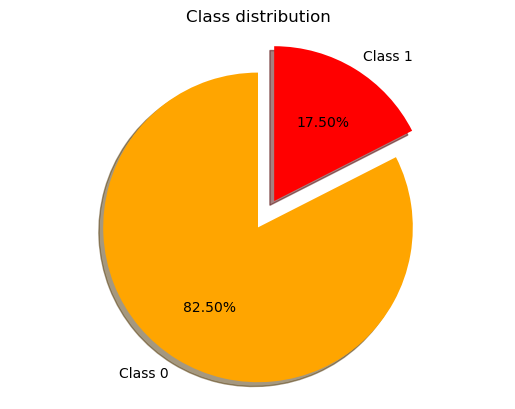

In [41]:
import matplotlib.pyplot as plt
sizes = list(data.Class.value_counts())
labels = ['Class 0', 'Class 1']
colors = ['orange', 'red']
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,explode=(0.1, 0.1),autopct='%1.2f%%')
plt.title('Class distribution')
plt.axis('equal')
plt.show()

As shown, the distribution of the target variables is extremely imbalanced with positive samples only accounting for 17.5% (108/617) of the data. This is troublesome for classification problems since the trained model will inherently be biased towards the majority class and subsequently perform poorly for the minority class. Class Weighting and Resampling were explored to account for the imbalanced data.

<b>Class Weighting</b> helps by assigning a higher weight to the minority class when training the model. More specifically, a greater priority is given to the minority class by influencing the cost function in a way which will result in a higher relative penalty for a misclassified minority class.

A general formula for class weights is given by:

$$w_i = \frac{n_{total}}{n_{classes} \times n_{i}}$$

where $n_{total}$ = total number of samples,

$n_{classes}$ = total number of different classes,

$n_{i}$ = total number of samples of class $i$.

In [44]:
# Calculate the number of samples for each label.
neg, pos = np.bincount(data['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Class weight for class 0: {:.2f}'.format(weight_for_0))
print('Class weight for class 1: {:.2f}'.format(weight_for_1))

Class weight for class 0: 0.61
Class weight for class 1: 2.86


<b>Oversampling</b> is another approach to imbalanced datasets and operates by replicating instances of the minority class through various methods. Two of interest are random oversampling (ROS) and synthetic minority oversampling (SMOTE).

<b>ROS</b> simply duplicates existing examples from the minority class though random selection with replacement. This has the same effect as increasing samples of the minority class. 

<b>SMOTE</b> generates new instances by randomly selecting a point on lines between 
existing examples.

<b>Stratified Sampling</b>

Another consideration of imbalanced datasets is the distribution of each class in the training and test sets. Ideally, the training set should be a perfect representation of the test set, void of sampling bias. Stratified sampling solves this by partitioning the total population into subgroups corresponding to each class before selecting instances from each group to ensure that the training and test set accurately represent the proportion of the entire dataset.

We achieved this easily using the stratify parameter in train_test_split.

In [53]:
from sklearn.model_selection import train_test_split
X = np.array(X)
y = np.array(y).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, shuffle=True, random_state=1)
neg, pos = np.bincount(y_train.ravel())
print(f'proportion of class 1 in training set: {pos/(neg + pos)}')
neg, pos = np.bincount(y_test.ravel())
print(f'proportion of class 1 in test set: {pos/(neg + pos)}')

proportion of class 1 in training set: 0.1740139211136891
proportion of class 1 in test set: 0.1774193548387097


<b><font size="20">Hyperparameter tuning</font></b>

<b>The models explored and their respective hyperparameters are listed as below:</b>

|Model|Hyperparameters|
|---|---|
|Linear Regression|   |
|Decision Tree|   |
|Support Vector Classifier|   |
|Random Forest|   |
|AdaBoost|   |


<b>Grid Search Cross Validation</b>

We turned the hyperparameters using Grid Search Cross Validation (GridSearchCV). Even though GridSearchCV is a computationally exhausting process having to test every possible permutation of hyperparameters, the relatively small dataset mitigated this. Additionally, GridSearchCV was performed using an evaluation metric with the choice of metrics being explored in a later section.

<b>K-Fold Cross Validation</b>

K-Fold cross validation was also performed during this GridSearchCV using 5 folds. This means that for every model, there was a 80:20 split between the training and validation set. This provided an accurate evaluation of a model's performance, giving insight into how the model adapts to unknown datasets.

<b><font size="15">Evaluation Metrics</font></b>

<b>Accuracy</b>

<b>Balanced Logarithmic Loss</b>

This is the evaluation metric which Kaggle will utilise to evaluate the submitted predictions and models.

The formula for balanced logarithmic loss is given by:

$$\frac{-\frac{1}{N_0}\sum_{i=1}^{N_0}y_{0i}\log{p_{0i} -\frac{1}{N_1}\sum_{i=1}^{N_1}y_{1i}\log{p_{1i}}}}{2}$$

where:

$N_{c}$ is the number of observations of class $c$,

$y_{ci}$ equals 1 if observation $i$ belongs to class $c$ and 0 otherwise,

$p_{ci}$ is the predicted probability that observation $i$ belongs to class $c$.

Futhermore, to avoid extremeties resulting from the log function, $p$ was replaced with: max(min($p, 1 - 10^{-15}$), $10^{-15}$)

As can be seen, the balanced logarithmic loss metric addresses the class disparity by ensuring that both classes contribute equally to the loss.

<b>F1 score</b>

<b>ROC AUC score</b>

<b><font size="20">Results</font></b>

Presentation of results using figures and tables

Result evaluation using appropriate metrics

Evaluation of various hyper-parameters and design choices

Analysis of feature importance

Maximum score 8

<b><font size="20">Discussion</font></b>

Comparison of different methods, their features and performances

Discussion of metrics and which are more appropriate and why

Discussion of future improvements

Maximum score 5

<b><font size="20">Conclusion</font></b>

A summary of the problem, method, results and discussion

Maximum score 2